In [35]:
import pandas as pd
import matplotlib.pyplot as plt

O objetivo deste projeto é realizar uma análise detalhada dos cartões (amarelos e vermelhos) distribuídos em partidas de futebol. A intenção é identificar padrões e tendências relacionadas à frequência de cartões, as circunstâncias em que são aplicados, e como eles impactam o resultado das partidas. 

A base de dados em questão utilizam 8404 partidas do campeonato brasileiro de futebol no período de 2003 à 2023

In [12]:
#Extraindo a base de dados e colocando o separador como vírgula

dados = pd.read_csv('./campeonato-brasileiro-cartoes.csv', sep = ',')

In [13]:
dados

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
1,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44
2,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
3,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86
4,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10
...,...,...,...,...,...,...,...,...
18852,8405,38,Vasco,Amarelo,Gabriel Pec,11.0,Atacante,90+5
18853,8405,38,Vasco,Amarelo,Paulinho,18.0,Meio-campo,51
18854,8405,38,Vasco,Amarelo,Gary Medel,17.0,Zagueiro,84
18855,8405,38,Bragantino,Amarelo,Eduardo Sasha,19.0,Atacante,17


Como a base de dados veio com uma coluna errada, trocarei o nome para o correto

In [14]:
dados.rename(columns={'rodata':'rodada'}, inplace=True)

In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18857 entries, 0 to 18856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   partida_id  18857 non-null  int64  
 1   rodada      18857 non-null  int64  
 2   clube       18857 non-null  object 
 3   cartao      18857 non-null  object 
 4   atleta      18851 non-null  object 
 5   num_camisa  18471 non-null  float64
 6   posicao     17659 non-null  object 
 7   minuto      18857 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


Irei remover as linhas do meu data frame que estão com posicao e atleta nulos, pois podem prejudicar o estudo

In [16]:
dados_sem_nulos = dados.dropna()
dados_sem_nulos.rename(columns={'rodata':'rodada'}, inplace=True)

C:\Users\Emidio\AppData\Local\Temp\ipykernel_17644\2568731570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_nulos.rename(columns={'rodata':'rodada'}, inplace=True)


In [17]:
dados_sem_nulos

,partida_id,rodada,clube,cartao,atleta,num_camisa,posicao,minuto
1,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44
2,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
5,4608,1,Internacional,Amarelo,Juan Silveira dos Santos,4.0,Zagueiro,20
7,4609,1,Coritiba,Amarelo,Carlos Emiliano Pereira,30.0,Zagueiro,76
8,4612,1,Bahia,Amarelo,Cristian Chagas Tarouco,3.0,Zagueiro,78
...,...,...,...,...,...,...,...,...
18852,8405,38,Vasco,Amarelo,Gabriel Pec,11.0,Atacante,90+5
18853,8405,38,Vasco,Amarelo,Paulinho,18.0,Meio-campo,51
18854,8405,38,Vasco,Amarelo,Gary Medel,17.0,Zagueiro,84
18855,8405,38,Bragantino,Amarelo,Eduardo Sasha,19.0,Atacante,17


In [18]:
dados_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17325 entries, 1 to 18856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   partida_id  17325 non-null  int64  
 1   rodada      17325 non-null  int64  
 2   clube       17325 non-null  object 
 3   cartao      17325 non-null  object 
 4   atleta      17325 non-null  object 
 5   num_camisa  17325 non-null  float64
 6   posicao     17325 non-null  object 
 7   minuto      17325 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


Com as devidas linhas removidas, irei começar as análises. 


1) Primeiro vou começar descobrindo a quantidade de cartões por posições dos jogadores

In [19]:
dados_zag_com_cartoes = dados_sem_nulos.query('posicao == "Zagueiro"')
dados_mc_com_cartoes = dados_sem_nulos.query('posicao == "Meio-campo"')
dados_at_com_cartoes = dados_sem_nulos.query('posicao == "Atacante"')

In [20]:
print( "O número de zagueiros com cartões é: ")
print(dados_zag_com_cartoes.__len__())

print( "\nO número de meio-campos com cartões é: ")
print(dados_mc_com_cartoes.__len__())

print( "\nO número de atacantes com cartões é: ")
print(dados_at_com_cartoes.__len__())

O número de zagueiros com cartões é: 
6602

O número de meio-campos com cartões é: 
7668

O número de atacantes com cartões é: 
2443


No futebol, o meio-campo é uma posição crucial e muito disputada, o que frequentemente leva a mais cartões amarelos ou vermelhos em comparação com zagueiros e atacantes.

Algumas dessas razões podem ser:

Maior número de disputa de bola: Normalmente é no meio de campo que ocorrem maioria tentativas de roubadas de bola, que podem ocasionar em faltas com cartões

Maior responsabilidade de marcação: Como é o setor onde a bola mais fica, acaba ficando com eles, ficam mais propensos a essas responsabilidades

Faltas táticas: Faltas táticas, como faltas para matar contra ataques, que costumam ocasionar em cartões, costumam ser feitas por jogadores do setor de meio campo


O resultado desse dado pode surpreender o senso comum, já que talvez o esperado é esperar que os zagueiros sejam o maior número desses dados

2) Agora, quero descobrir em qual rodada esses cartões mais saíram

Rodada que mais aparece: 37
Frequência dessa rodada: 542


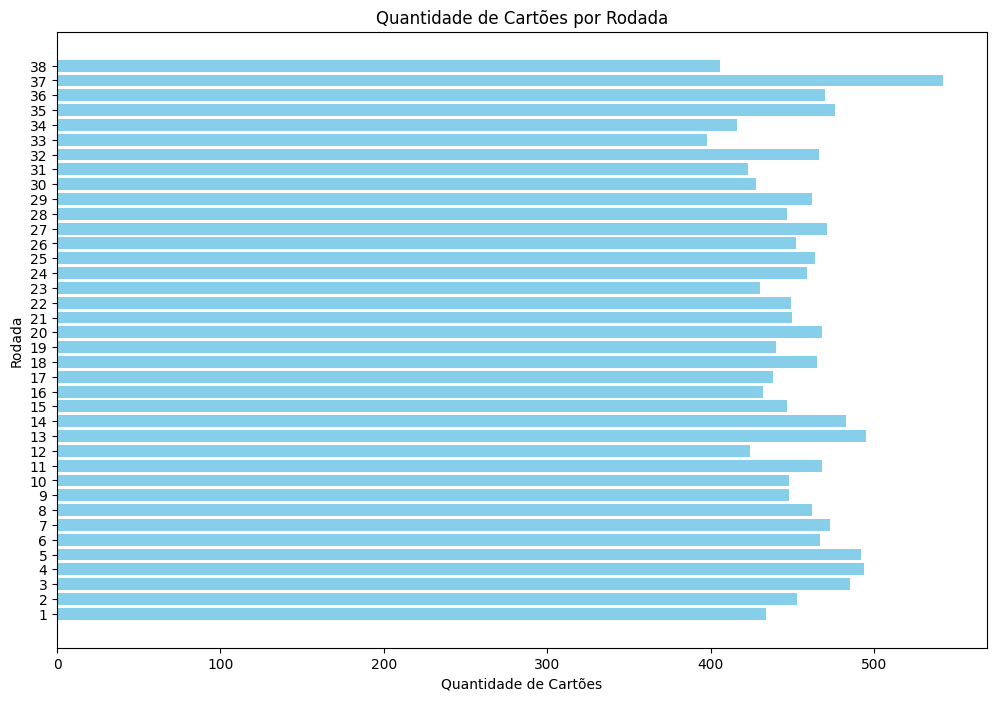

In [102]:
# Contar a frequência de cada valor na coluna 'rodada'
frequencia_cartoes_rodadas = dados_sem_nulos['rodada'].value_counts().sort_index()

# Encontrar o valor com a maior contagem, no caso o número da rodada
print("Rodada que mais aparece:", frequencia_cartoes_rodadas.idxmax())

# Se você quiser também saber quantas vezes essa rodada aparece, no caso quantas vezes ela repete
print("Frequência dessa rodada:", frequencia_cartoes_rodadas.max())

plt.figure(figsize=(12, 8))

# Plote o gráfico de barras horizontais
plt.barh(y=frequencia_cartoes_rodadas.index, width=frequencia_cartoes_rodadas.values, color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Cartões por Rodada')
plt.ylabel('Rodada')
plt.xlabel('Quantidade de Cartões')

# Garantir que todos os valores de rodadas (1 a 38) apareçam no eixo y
plt.yticks(ticks=frequencia_cartoes_rodadas.index)

# Exibir o gráfico
plt.show()



Esse é um resultado esperado, é comum em retas finais de campeonatos os jogos ficarem mais nervosos, já que muitos jogos nessa etapa costumam ser decisivos tanto para fugas de rebaixamentos, quanto para classificações em campeonatos, então os jogadores ficam mais exaltados, então reclamam mais acintosamente e fazem mais faltas, podendo ocasionando em mais cartões

3) Em qual tempo esses cartões saem mais? (1° ou 2°) ?

Considerando cada tempo com 45 minutos (desconsiderarei os acréscimos), os cartões com 45 minutos ou menos considerarei 1° tempo, o restante 2° tempo

In [22]:
dados_cartoes_primeiro_tempo = dados_sem_nulos.query('minuto <= "45"')
dados_cartoes_segundo_tempo = dados_sem_nulos.query('minuto > "45" and minuto <= "90"')


In [88]:
print("Cartões no 1° tempo:", dados_cartoes_primeiro_tempo.__len__())
print("\nCartões no 2° tempo:", dados_cartoes_segundo_tempo.__len__())

Cartões no 1° tempo: 5463

Cartões no 2° tempo: 10084


Esses valores são também esperados, o 2° tempo, de modo geral, costuma sair bem mais cartões que o primeiro, esses motivos podem variar desde o árbitro conversar mais e evitar cartões no inicio do jogo, até os jogadores serem mais precavidos no inicio, já que tomar um cartão cedo significa jogar o restante do jogo inteiro pendurado, e isso pode atrapalhar o atleta, já que por exemplo não poderia fazer as famosas faltas táticas no 2° tempo, já que estaria pendurado com um cartão

4) Qual o clube que mais tomou cartões? (Quantos amarelos e vermelhos?)

In [74]:
# Contar a frequência de cada valor na coluna 'clube'
frequencia_cartoes_clubes = dados_sem_nulos['clube'].value_counts()

# Nome do clube que mais tomou cartão
print("Clube que mais tomou cartão:", frequencia_cartoes_clubes.idxmax())

# Quantidade de cartões
print("\nQuantidade de cartões:", frequencia_cartoes_clubes.max())

cartoes_vermelhos_clube_com_mais_cartoes = dados_sem_nulos.query(f'clube == "{frequencia_cartoes_clubes.idxmax()}" and cartao == "Vermelho"')

print("\nQuantidade de cartões vermelhos:", cartoes_vermelhos_clube_com_mais_cartoes.__len__())

print("\nQuantidade de cartões amarelos:", frequencia_cartoes_clubes.max() - cartoes_vermelhos_clube_com_mais_cartoes.__len__())


Clube que mais tomou cartão: Sao Paulo

Quantidade de cartões: 889

Quantidade de cartões vermelhos: 45

Quantidade de cartões amarelos: 844


Esse dado pode ou não significar algo, ele apenas diz qual foi o clube que mais tomou cartão no período de 2003 à 2023 no campeonato brasileiro. O que podemos afirmar é que é um time comum a se ter isso, visto que foi um dos poucos que jogaram a competição durante o periodo todo de análise

5) Os 20 clubes que mais tomaram cartões

Text(0, 0.5, 'Quantidade de cartões')

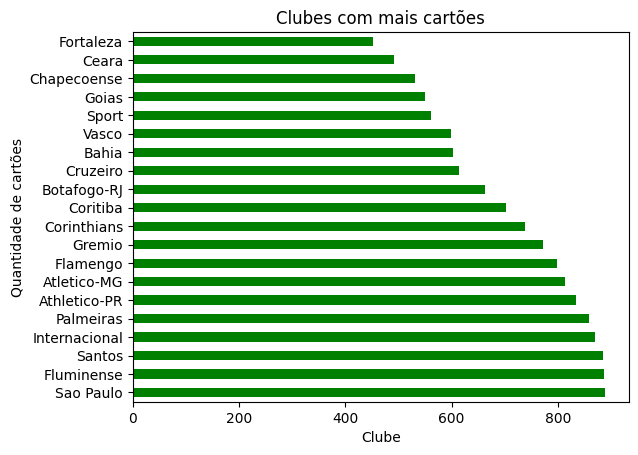

In [75]:
frequencia_cartoes_clubes.head(20)


frequencia_cartoes_clubes.head(20).plot(kind='barh', color='green')

plt.title('Clubes com mais cartões')
plt.xlabel('Clube')
plt.ylabel('Quantidade de cartões')


6) Os 20 jogadores que mais tomaram cartões

In [ ]:
frequencia_cartoes_jogador = dados_sem_nulos['atleta'].value_counts().head(20)

print(frequencia_cartoes_jogador)

atleta
Thiago Heleno                   76
Fagner                          70
Samuel Xavier                   69
Lucas Rafael Araújo Lima        66
Reinaldo Manoel da Silva        64
Walter Kannemann                63
Bruno Henrique                  59
Felipe Melo                     59
Wellington Aparecido Martins    58
Fred                            58
Víctor Cuesta                   58
José Rafael Vivian              56
João Paulo                      55
Bruno César Pereira da Silva    53
David Braz                      53
Gabriel Barbosa                 52
Nino Paraíba                    50
Jadson                          50
Fábio Santos                    49
Gabriel Girotto Franco          49
Name: count, dtype: int64


A presença de alguns atacantes na lista, como o Gabriel Barbosa, pode ser surpreendente pra alguns, é provável que muito desses cartões que ele tenha tomado sejam por reclamações

7) Quantos vermelhos e amarelos o jogador com mais cartões levou?

In [ ]:
cartoes_vermelhos_jogador_com_mais_cartoes = dados_sem_nulos.query(f'atleta == "{frequencia_cartoes_jogador.idxmax()}" and cartao == "Vermelho"')

print("\nQuantidade de cartões vermelhos:", cartoes_vermelhos_jogador_com_mais_cartoes.__len__())

print("\nQuantidade de cartões amarelos:", frequencia_cartoes_jogador.max() - cartoes_vermelhos_jogador_com_mais_cartoes.__len__())



Quantidade de cartões vermelhos: 6

Quantidade de cartões amarelos: 70


8) Qual foi a partida que teve mais cartões?

C:\Users\Emidio\AppData\Local\Temp\ipykernel_17644\1012803872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_nulos['duelo'] = dados_sem_nulos.groupby('partida_id')['clube'].transform(lambda x: ' x '.join(sorted(x.unique())))


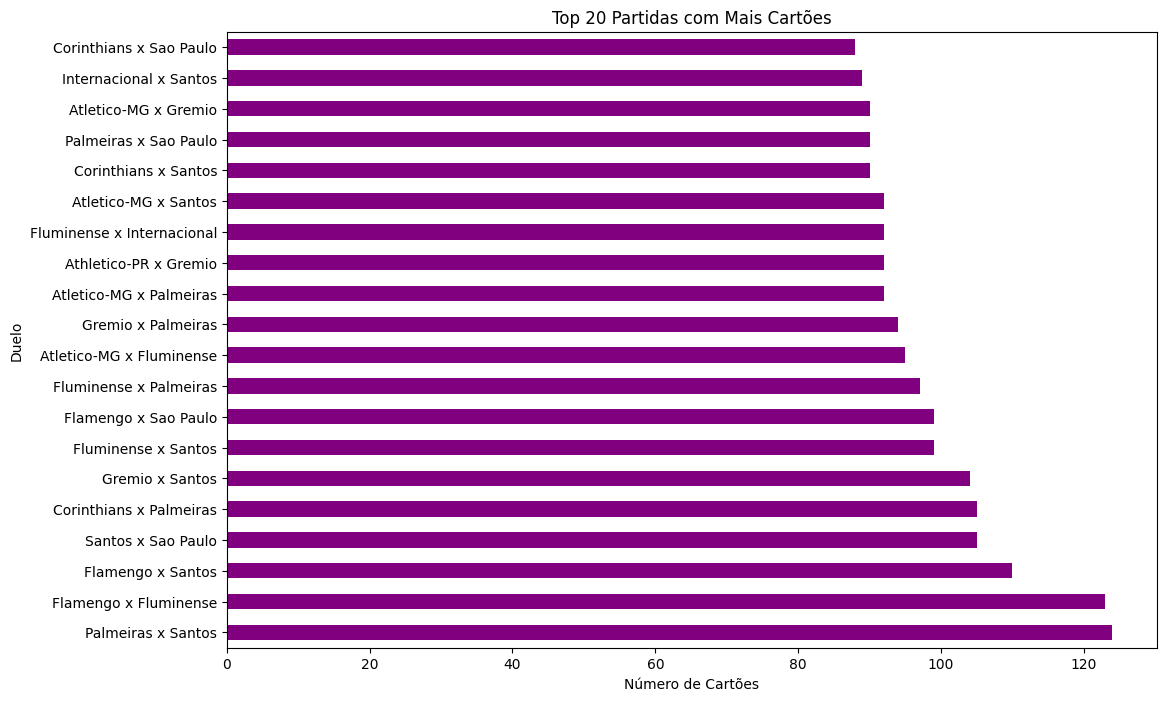

In [100]:
# Criar uma nova coluna 'duelo' que combina os nomes dos clubes para cada partida
dados_sem_nulos['duelo'] = dados_sem_nulos.groupby('partida_id')['clube'].transform(lambda x: ' x '.join(sorted(x.unique())))

# Contar o número de cartões por duelo
cartoes_por_duelo = dados_sem_nulos.groupby('duelo').size().sort_values(ascending=False).head(20)

# Plotar o gráfico de barras horizontal usando os duelos
plt.figure(figsize=(12, 8))
cartoes_por_duelo.plot(kind='barh', color='purple')

# Adicionar título e rótulos aos eixos
plt.title('Top 20 Partidas com Mais Cartões')
plt.xlabel('Número de Cartões')
plt.ylabel('Duelo')

# Exibir o gráfico
plt.show()


Note que, os 5 confrontos em que mais saíram cartões foram todos clássicos(confronto entre times do mesmo estado), o que é bastante comum pelo Brasil, já que clássicos costumam ser muito mais disputados de um modo geral. Existe até uma famosa frase que roda em todos os clássicos, "clássico não se joga, clássico se ganha". Isso evidencia muito a forma como ele é visto por aqui